In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats


In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#"As you can see, the data is organized by order, with multiple products ordered by the same user ID.  I'm going to reframe the data into a pivot table to organize it by User_ID.

In [3]:
df1 = df.groupby(['User_ID'], as_index=False).agg({'City_Category':'first', 'Occupation':'first', 'Stay_In_Current_City_Years':'first', 'Gender':'first','Age':'first','Purchase':'sum'})
df1.head()
#print(len(df1))

,User_ID,City_Category,Occupation,Stay_In_Current_City_Years,Gender,Age,Purchase
0,1000001,A,10,2,F,0-17,333481
1,1000002,C,16,4+,M,55+,810353
2,1000003,A,15,3,M,26-35,341635
3,1000004,B,7,2,M,46-50,205987
4,1000005,A,20,1,M,26-35,821001


In [4]:
df1.isna().any()

User_ID                       False
City_Category                 False
Occupation                    False
Stay_In_Current_City_Years    False
Gender                        False
Age                           False
Purchase                      False
dtype: bool

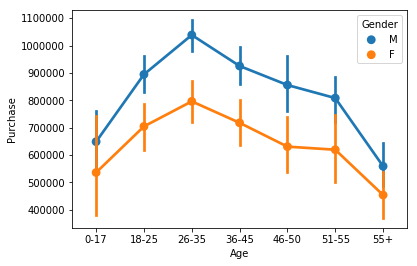

In [55]:
sns.pointplot(x=df1['Age'], y=df1['Purchase'], hue=df1['Gender'], order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], hue_order=['M','F'])

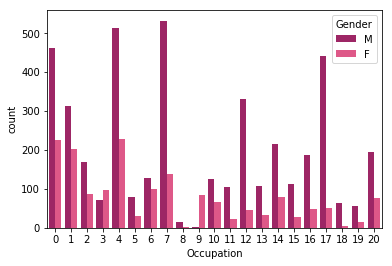

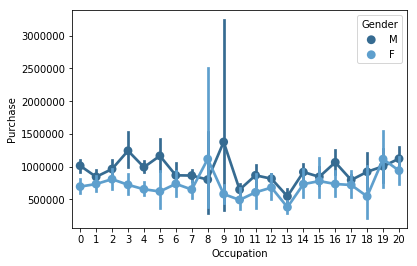

In [6]:
sns.countplot(df1['Occupation'], hue=df1['Gender'], palette="Accent_d", hue_order=['M','F'])
plt.show()
sns.pointplot(x=df1['Occupation'], y=df1['Purchase'], hue=df1['Gender'], palette="Blues_d", hue_order=['M','F'])
plt.show()

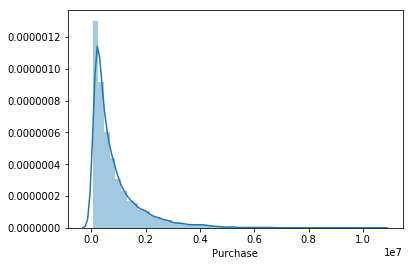

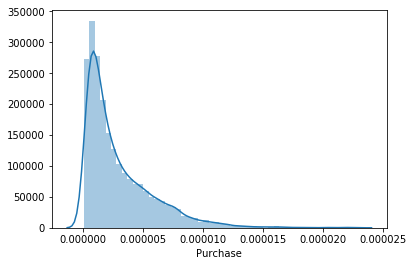

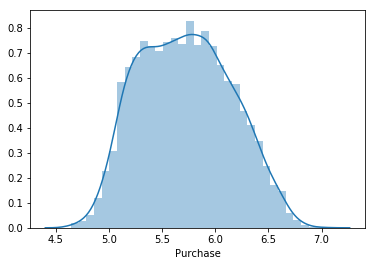

In [9]:
sns.distplot(df1['Purchase'])
plt.show()
sns.distplot(df1['Purchase'].transform(lambda x: (1/(x+1))))
plt.show()
sns.distplot(df1['Purchase'].transform(lambda x: np.log10(x+1)))
plt.show()

In [8]:
df1['PurchaseTx'] = df1['Purchase'].transform(lambda x: np.log10(x+1))


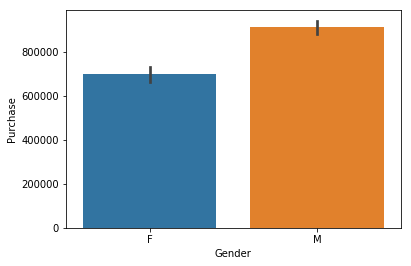

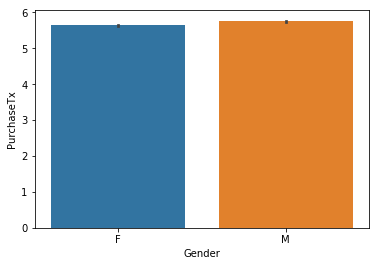

In [10]:
q = sns.barplot(df1['Gender'], df1['Purchase'])
plt.show()
z = sns.barplot(df1['Gender'], df1['PurchaseTx'])
plt.show()

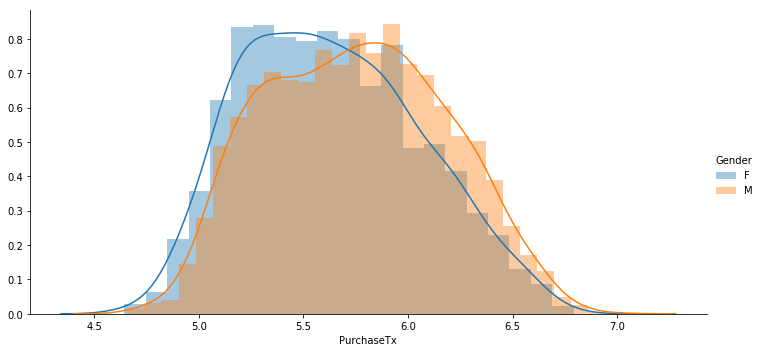

In [11]:
g = sns.FacetGrid(df1, hue="Gender", height = 5, aspect = 2)
g = g.map(sns.distplot, "PurchaseTx")
g.add_legend()

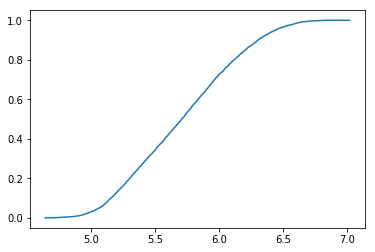

In [12]:
ecdf = ECDF(df1["PurchaseTx"])
plt.plot(ecdf.x,ecdf.y)
plt.show()
x = df1.loc[df1['Gender'] == 'F', 'PurchaseTx']
z = df1.loc[df1['Gender'] == 'M', 'PurchaseTx']
ecdf1 = ECDF(x)
ecdf2 = ECDF(z)


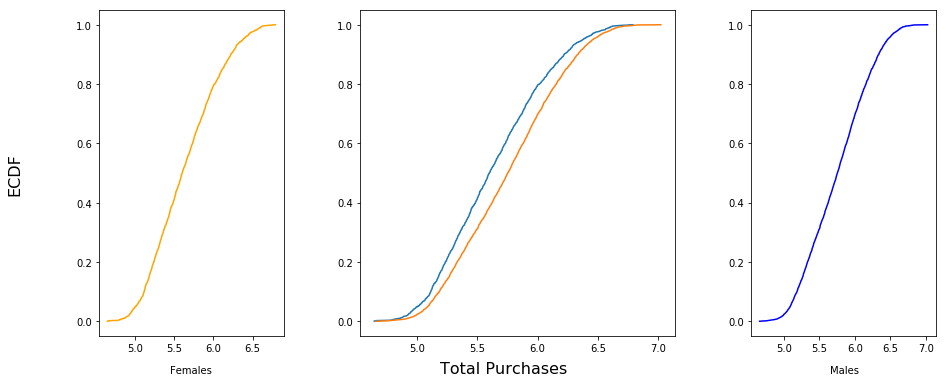

In [13]:
grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=(15, 6))
grid = plt.GridSpec(1, 13, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:, 4:9])
x_ecdf = fig.add_subplot(grid[:, 0:3])
y_ecdf = fig.add_subplot(grid[:, 10:13])
main_ax.plot(ecdf1.x, ecdf1.y)
main_ax.plot(ecdf2.x, ecdf2.y)

fig.text(0.5, 0.04, 'Total Purchases', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'ECDF', va='center', rotation='vertical', fontsize=16)
fig.text(0.21, 0.04, 'Females', ha='center', fontsize=10)
fig.text(0.815, 0.04, 'Males', ha='center', fontsize=10)

x_ecdf.plot(ecdf1.x, ecdf1.y, color='orange')
y_ecdf.plot(ecdf2.x, ecdf2.y, color='blue')

plt.show()

In [14]:
def permutation_sample(data1, data2):
    
    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

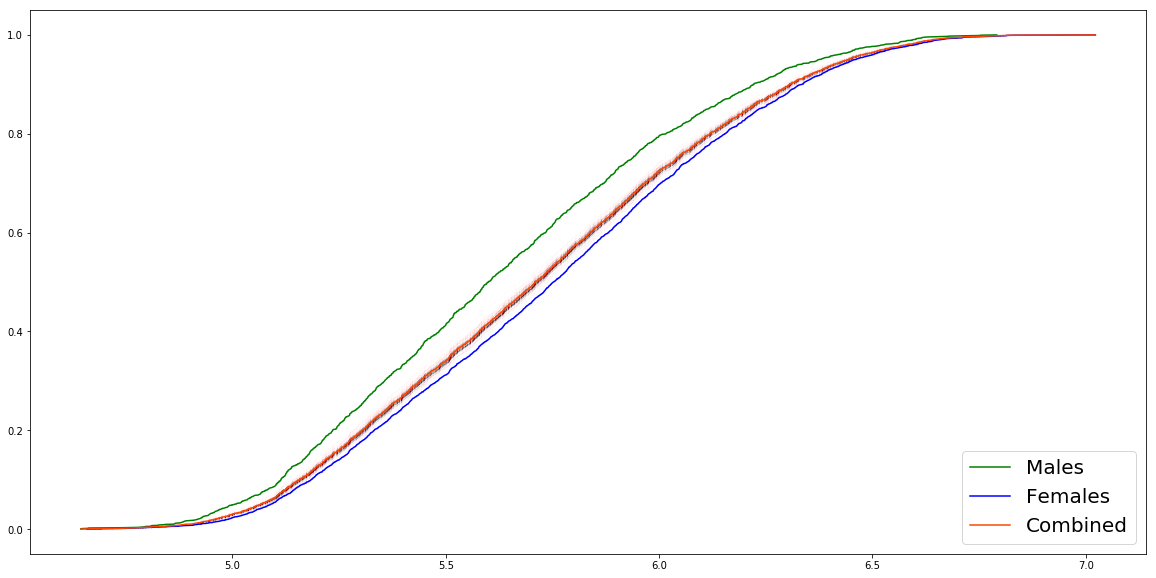

In [53]:
plt.figure(figsize=(20,10))
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(x, z)
    ecdf3 = ECDF(perm_sample_1)
    ecdf4 = ECDF(perm_sample_2)
    plt.plot(ecdf3.x,ecdf3.y, marker = '.', linestyle='none', color='hotpink', alpha=.002, markersize=2)
    plt.plot(ecdf4.x,ecdf4.y, marker = '.', linestyle='none', color='maroon', alpha=.002, markersize=2)
    
plt.plot(ecdf1.x,ecdf1.y, color='green', label = "Males")
plt.plot(ecdf2.x,ecdf2.y, color='blue', label = "Females")
plt.plot(ecdf.x,ecdf.y, color='orangered', label = "Combined")
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [19]:
x1, z1 = stats.ttest_ind(x,z)
print("t = " + str(x1))
print("p = " + str(2*z1))

t = -9.647696778425644
p = 1.45817216440557e-21
